In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de accuracy

## Se calculan los errores

In [5]:
#verificar el tema de los tamaños xd
ground_truth = pd.read_csv('y_output_gemini.csv')
ground_truth.shape

(21837, 8)

In [18]:
predicted = pd.read_csv('likelihood_output_summary.csv')
predicted.shape

(4592, 9)

In [32]:
df_error_abs = ( predicted[predicted.columns[:-1]] - ground_truth ).abs() * 100
df_error_abs

,NORM,MI,INJ,ISC,ARRY,STTC,CD,HYP
0,1.20,0.34,0.01,0.00,3.08,0.33,0.54,0.04
1,14.37,2.88,0.05,0.05,14.48,0.15,2.68,2.19
2,2.40,0.39,0.06,0.07,4.43,3.94,1.06,0.09
3,2.84,0.21,0.02,0.01,11.41,0.02,5.55,2.61
4,0.46,0.38,0.01,0.00,7.04,0.03,0.36,0.21
...,...,...,...,...,...,...,...,...
21832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_error_abs.dropna()

,NORM,MI,INJ,ISC,ARRY,STTC,CD,HYP
0,1.20,0.34,0.01,0.00,3.08,0.33,0.54,0.04
1,14.37,2.88,0.05,0.05,14.48,0.15,2.68,2.19
2,2.40,0.39,0.06,0.07,4.43,3.94,1.06,0.09
3,2.84,0.21,0.02,0.01,11.41,0.02,5.55,2.61
4,0.46,0.38,0.01,0.00,7.04,0.03,0.36,0.21
...,...,...,...,...,...,...,...,...
4587,0.04,4.30,3.92,4.82,9.04,6.49,45.19,3.40
4588,26.52,6.30,0.10,1.77,6.25,29.48,35.65,6.94
4589,31.82,12.45,0.11,2.96,4.69,61.49,10.92,5.65
4590,90.01,0.97,0.01,0.03,7.72,0.09,49.05,3.11


## Plot según categoría

In [34]:
df_error_abs.describe()

,NORM,MI,INJ,ISC,ARRY,STTC,CD,HYP
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,14.489225,11.203079,1.534268,6.354480,3.962056,13.106923,12.335486,8.696823
std,22.869255,18.517978,8.296715,15.396279,3.222751,22.309109,22.395624,16.811572
min,0.000000,0.010000,0.000000,0.000000,0.300000,0.000000,0.030000,0.020000
25%,0.500000,0.340000,0.010000,0.010000,2.230000,0.157500,0.910000,0.310000
50%,3.070000,2.170000,0.050000,0.140000,3.220000,1.975000,2.620000,1.490000
75%,18.362500,13.250000,0.320000,3.232500,4.730000,14.405000,10.270000,7.962500
max,99.810000,99.150000,98.630000,99.870000,70.220000,99.940000,99.370000,99.760000


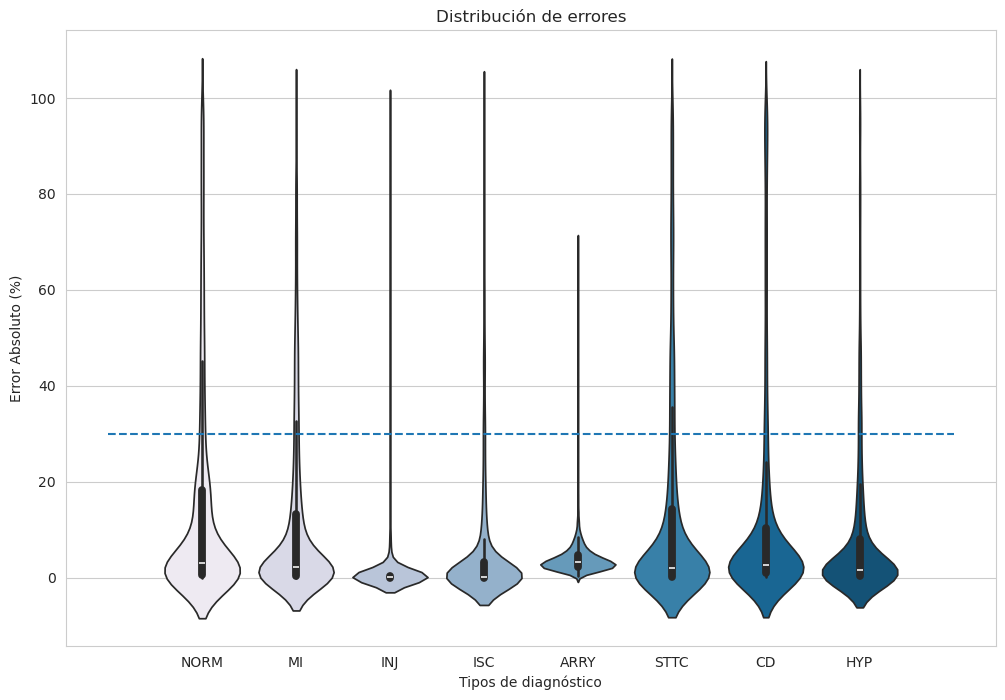

In [87]:
# Seaborn asumirá que cada columna es una variable.
sns.set_style("whitegrid")
colors = sns.color_palette("Blues", as_cmap=True)

df = df_error_abs
# Añadir títulos y etiquetas para mayor claridad
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, palette='PuBu')
plt.title("Distribución de errores")
plt.xlabel("Tipos de diagnóstico")
plt.ylabel("Error Absoluto (%)")
plt.hlines(y=30,xmin=-1, xmax=8, linestyle='--')
plt.savefig('dist_errores_violin_plot.pdf')
plt.show()

In [51]:
df_error_abs.mean()

NORM    14.489225
MI      11.203079
INJ      1.534268
ISC      6.354480
ARRY     3.962056
STTC    13.106923
CD      12.335486
HYP      8.696823
dtype: float64

In [77]:
predicted['TS'].mean()

np.float64(0.10716343641114984)

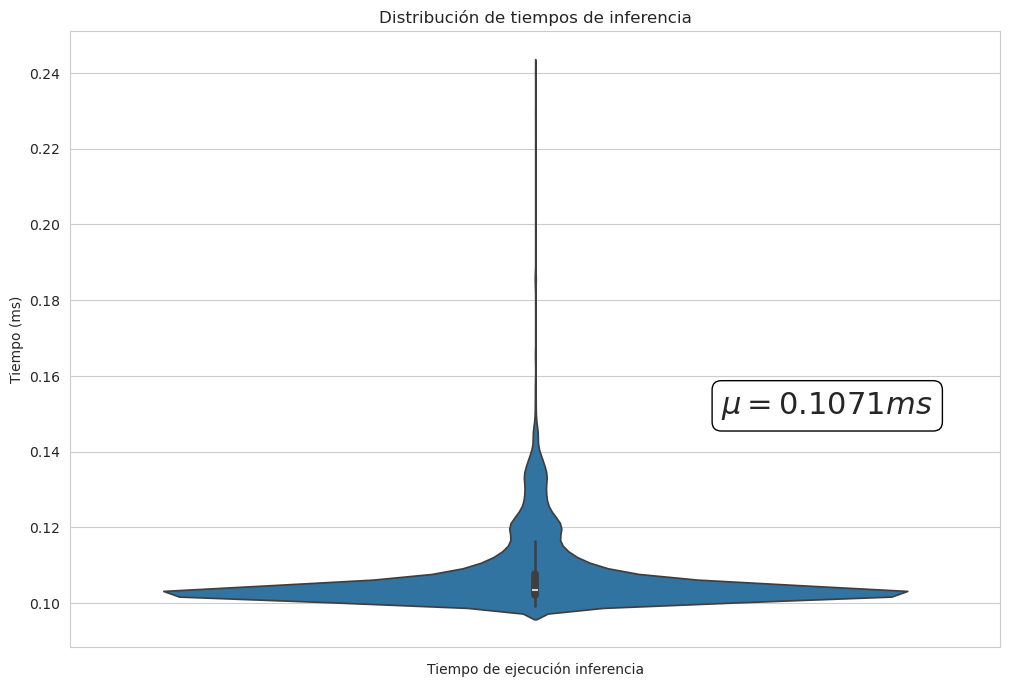

In [78]:
# Seaborn asumirá que cada columna es una variable.
sns.set_style("whitegrid")
df = predicted
# Añadir títulos y etiquetas para mayor claridad
plt.figure(figsize=(12, 8))
sns.violinplot(data=df['TS'])
plt.title("Distribución de tiempos de inferencia")
plt.xlabel("Tiempo de ejecución inferencia")
plt.ylabel("Tiempo (ms)")
#plt.hlines(y=0.01,xmin=-1, xmax=8, linestyle='--')

plt.text(0.2, 0.15, r'$\mu=0.1071ms$ ', fontsize=22,
         bbox=dict(boxstyle="round", ec=(0.0, 0.0, 0.0), fc=(1., 1, 1)))

plt.savefig('dist_violin_tiempo.pdf')
plt.show()